In [5]:
import amico
import os
from os.path import join
import matplotlib.pyplot as plt
from dipy.io.image import load_nifti


# The following dwi image processing applies NODDI. We used the following package: AMICO
https://github.com/daducci/AMICO/wiki/Fitting-the-NODDI-model
### The input images are eddy_corrected and brain mask has prepared elsewhere.

In [2]:
print(os.path.abspath(os.curdir))
os.chdir('../data_in')
print(os.path.abspath(os.curdir))

/home/balint/PycharmProjects/MRI_acq_and_proc/notebooks
/home/balint/PycharmProjects/MRI_acq_and_proc/data_in


In [3]:
amico.core.setup()

In [4]:
ae = amico.Evaluation("study-01", "sub-01")


In [5]:
amico.util.fsl2scheme("study-01/sub-01/NODDI_protocol.bval", "study-01/sub-01/NODDI_protocol.bvec")

#-> Writing scheme file to [ Study01/Subject01/NODDI_protocol.scheme ]
#'Study01/Subject01/NODDI_protocol.scheme'

-> Writing scheme file to [ study-01/sub-01/NODDI_protocol.scheme ]


'study-01/sub-01/NODDI_protocol.scheme'

In [6]:
ae.load_data(dwi_filename = "NODDI_DWI.nii.gz",
             scheme_filename = "NODDI_protocol.scheme",
             mask_filename = "roi_mask_brainslice.nii.gz", b0_thr = 0)


-> Loading data:
	* DWI signal
		- dim    = 110 x 110 x 64 x 133
		- pixdim = 2.000 x 2.000 x 2.000
	* Acquisition scheme
		- 133 samples, 3 shells
		- 13 @ b=0 , 60 @ b=2500.0 , 20 @ b=1000.0 , 40 @ b=1800.0 
	* Binary mask
		- dim    = 110 x 110 x 64
		- pixdim = 2.000 x 2.000 x 2.000
		- voxels = 4095
   [ 2.8 seconds ]

-> Preprocessing:
	* Normalizing to b0... [ min=0.00,  mean=0.74, max=195.00 ]
	* Keeping all b0 volume(s)
   [ 1.2 seconds ]


In [7]:
ae.set_model("NODDI")
ae.generate_kernels() #regenerate=True)




-> Creating LUT for "NODDI" model:

   [ 472.8 seconds ]


In [8]:
ae.load_kernels()


-> Resampling LUT for subject "sub-01":

   [ 262.0 seconds ]


In [9]:
ae.fit()


-> Fitting "NODDI" model to 4095 voxels:

   [ 00h 01m 13s ]


In [10]:
ae.save_results()



-> Saving output to "AMICO/NODDI/*":
	- configuration  [OK]
	- FIT_dir.nii.gz  [OK]
	- FIT_ICVF.nii.gz  [OK]
	- FIT_OD.nii.gz  [OK]
	- FIT_ISOVF.nii.gz  [OK]
   [ DONE ]


In [16]:
# here we visualize the results of AMICO
imgpath = '/home/balint/PycharmProjects/MRI_acq_and_proc/data_in/study-01/sub-01/'
nodifbrainimg = join(imgpath,'derivatives/nodif_brain.nii.gz')

noddipath = '/home/balint/PycharmProjects/MRI_acq_and_proc/data_in/study-01/sub-01/AMICO/NODDI/'
fit_dir = join(noddipath,'FIT_dir.nii.gz')
fit_icvf = join(noddipath,'FIT_ICVF.nii.gz')
fit_osivf = join(noddipath,'FIT_ISOVF.nii.gz')
fit_od = join(noddipath,'FIT_OD.nii.gz')
processedsclice = 31
data_nodfbr, affine, img = load_nifti(nodifbrainimg,return_img=True)
data_fit_dir, affine, img = load_nifti(fit_dir,return_img=True)
data_fit_icvf, affine, img = load_nifti(fit_icvf,return_img=True)
data_fit_osivf, affine, img = load_nifti(fit_osivf,return_img=True)
data_fit_od, affine, img = load_nifti(fit_od,return_img=True)


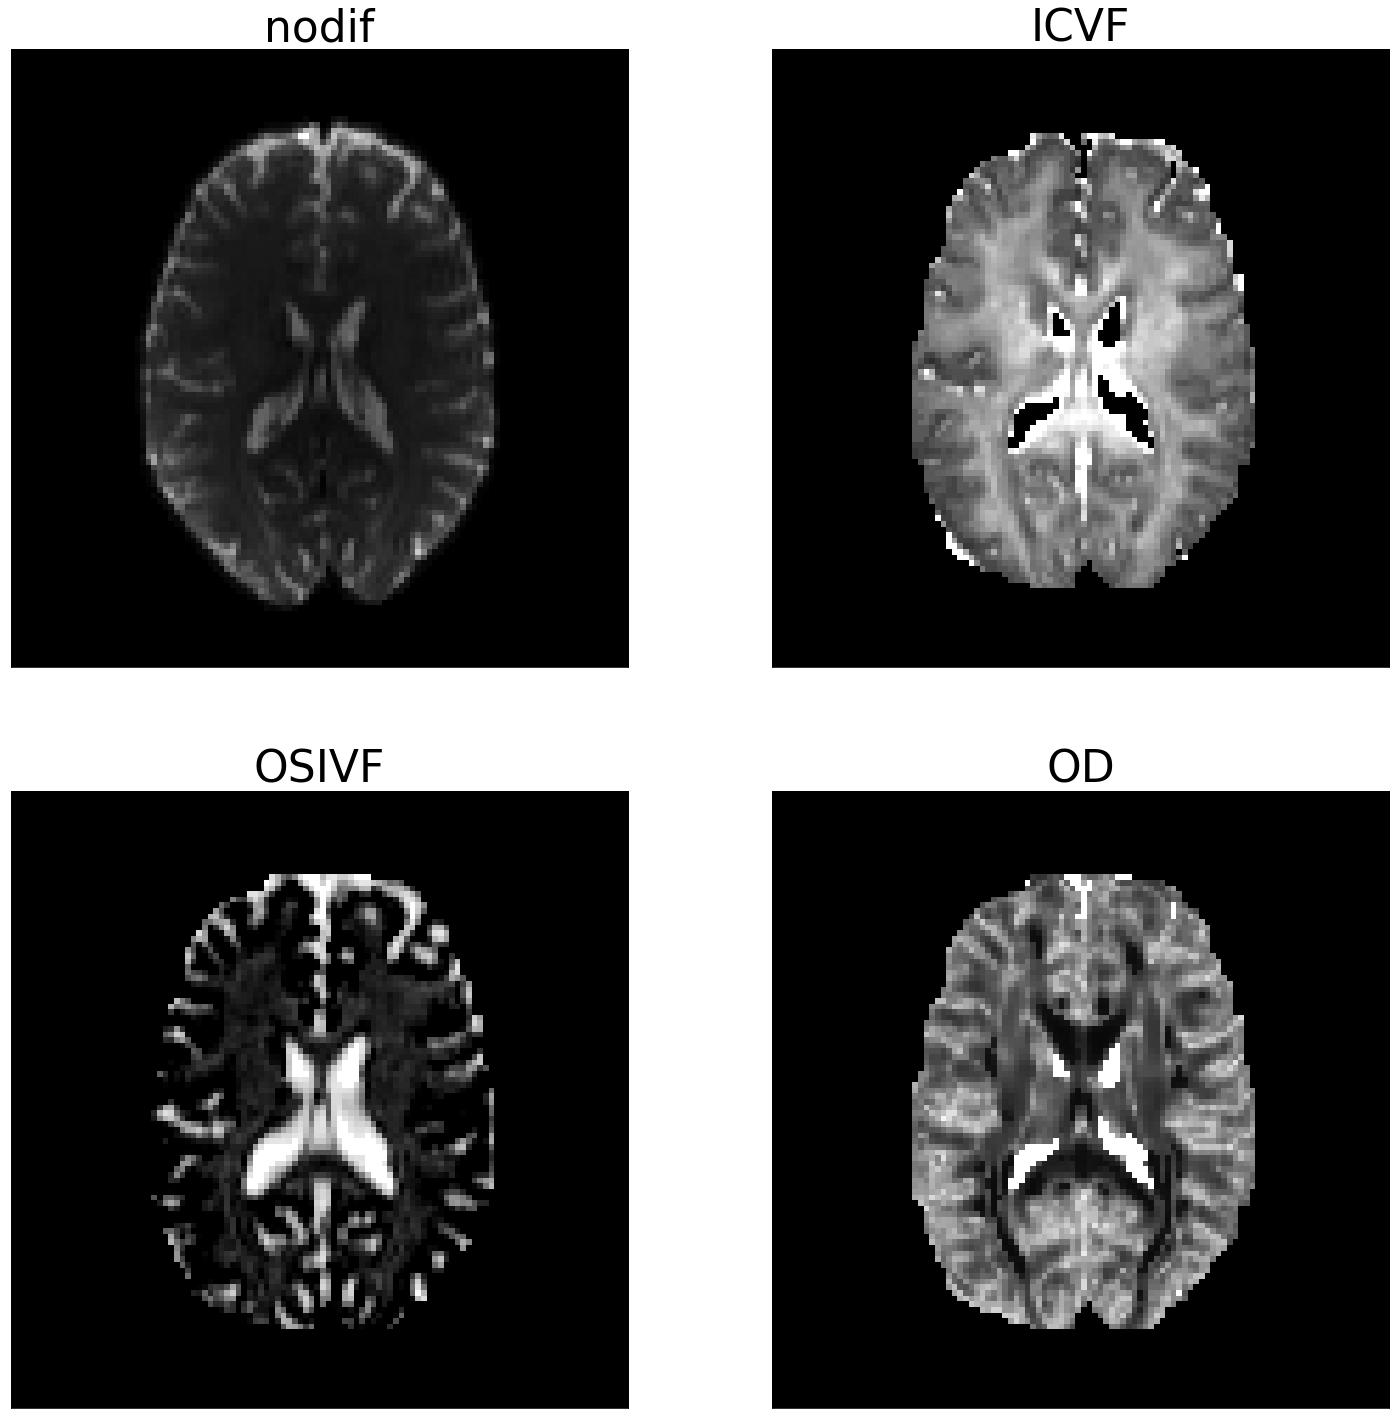

In [39]:
fig1, ax = plt.subplots(2, 2, figsize=(25, 25),
                        subplot_kw={'xticks': [], 'yticks': []})
ax.flat[0].imshow(data_nodfbr[:, :, processedsclice].T,cmap='gray',
                  origin='lower')
ax.flat[0].set_title('nodif',fontsize = 44)

ax.flat[1].imshow(data_fit_icvf[:, :, processedsclice].T,cmap='gray',
                  origin='lower')
ax.flat[1].set_title('ICVF',fontsize = 44)

ax.flat[2].imshow(data_fit_osivf[:, :, processedsclice].T,cmap='gray',
                  origin='lower')
ax.flat[2].set_title('OSIVF',fontsize = 44)

ax.flat[3].imshow(data_fit_od[:, :, processedsclice].T,cmap='gray',
                  origin='lower')
ax.flat[3].set_title('OD',fontsize = 44)

plt.show()

